In [1]:
import pandas as pd
from sqlalchemy import create_engine
from plotnine import *

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
engine = create_engine('sqlite:///../data/rainy.db', echo=False, isolation_level="AUTOCOMMIT")

with engine.connect() as conn:
    pass

In [3]:
query = '''
    SELECT 
        city,
        AVG(precipitation_hours) AS avg_precipitation_hours,
        AVG(precipitation_sum) AS avg_precipitation_sum
    FROM 
        weather
    GROUP BY 
        city;
'''

df = pd.read_sql(query, engine)
df = df.sort_values('avg_precipitation_hours')

In [4]:
df['city'] = pd.Categorical(df['city'], categories=df['city'], ordered=True)

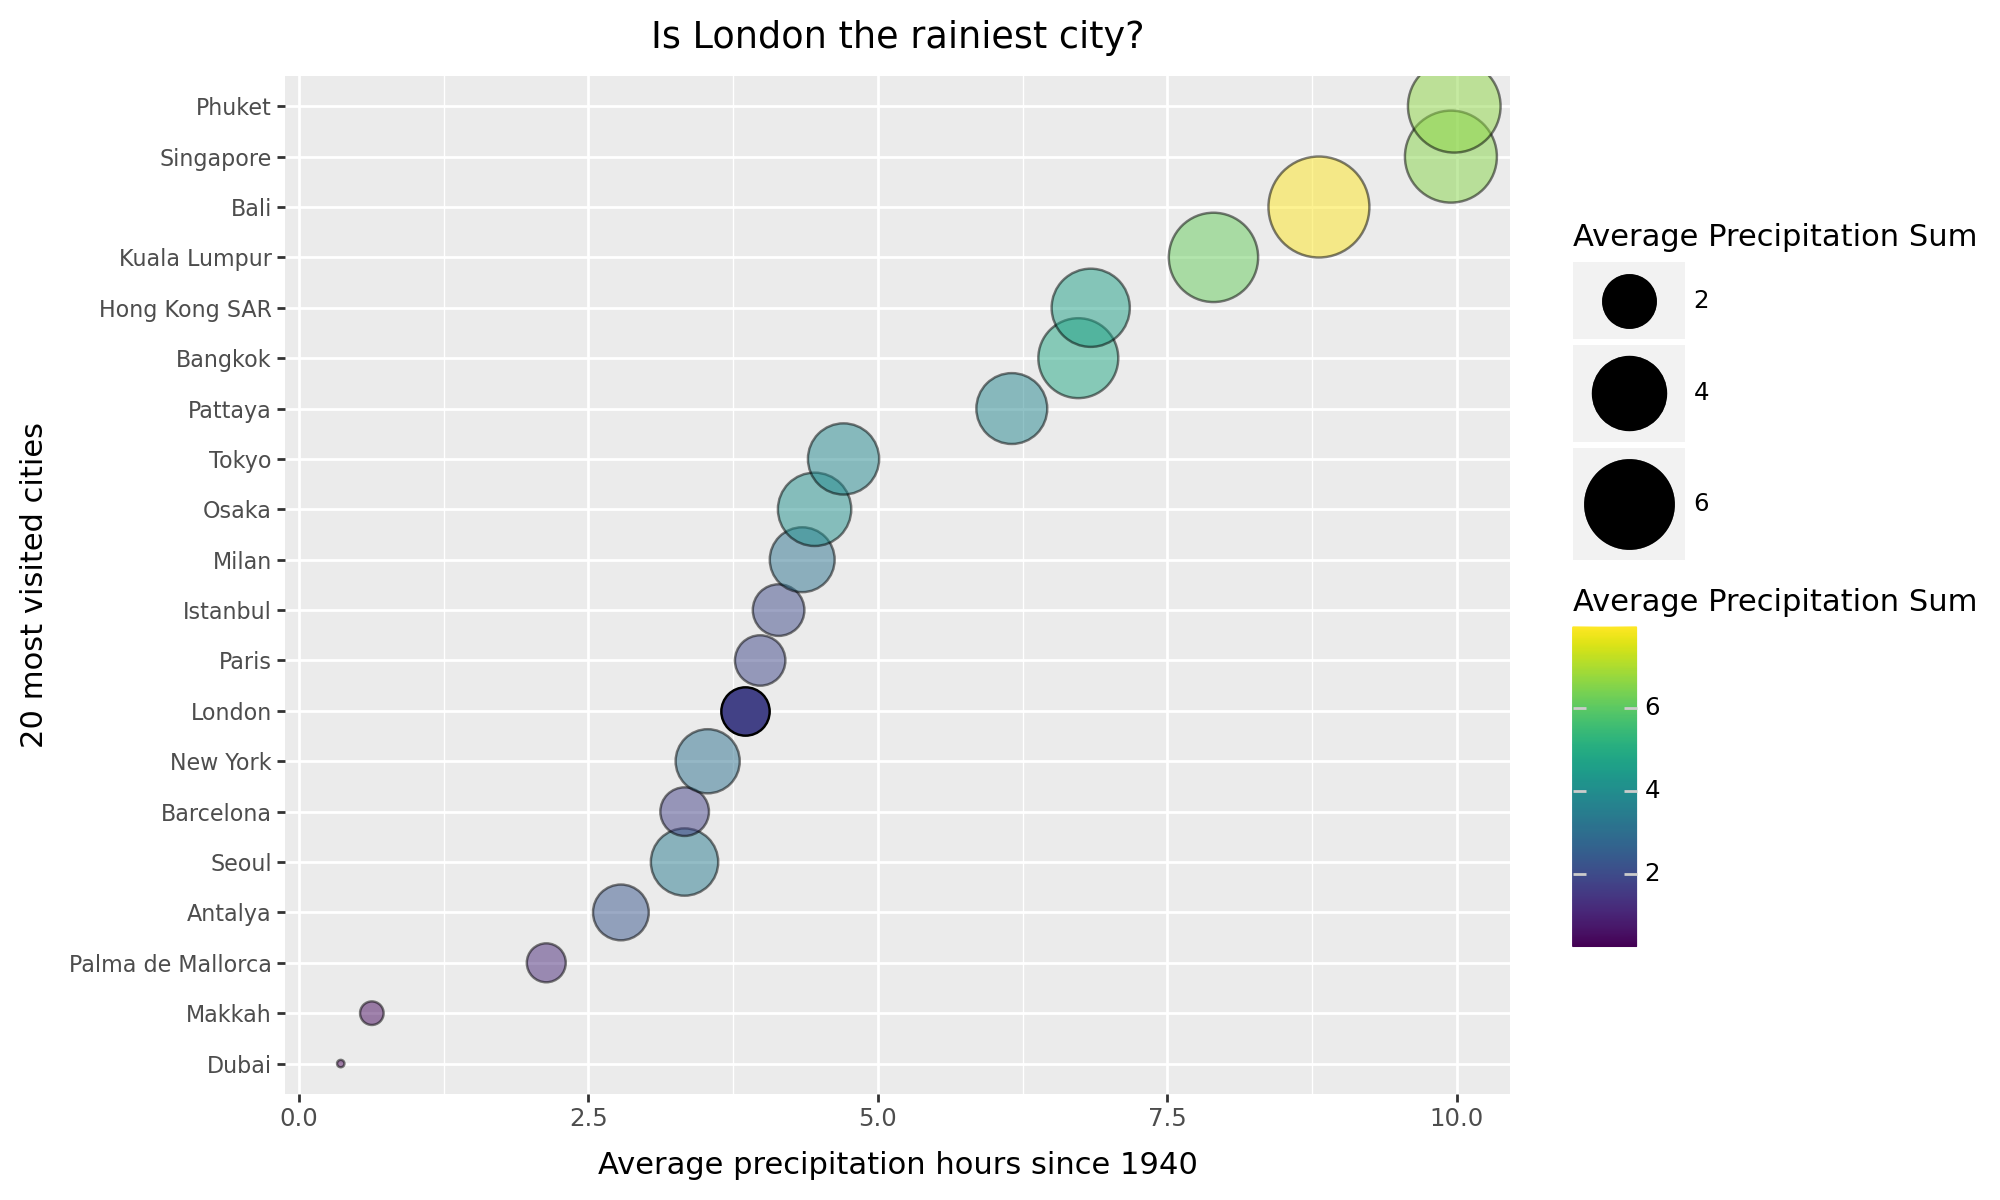

In [5]:
g = (
    ggplot(df, aes(x='city', y='avg_precipitation_hours', size='avg_precipitation_sum', fill='avg_precipitation_sum')) +
    geom_point(data=df[df['city'] == 'London'], alpha=1) +
    geom_point(data=df[df['city'] != 'London'], alpha=0.5) +
    coord_flip() +
    scale_size_continuous(range=(1, 20), name='Average Precipitation Sum') +
    scale_fill_continuous(name='Average Precipitation Sum') +
    labs(title='Is London the rainiest city?', x='20 most visited cities', y='Average precipitation hours since 1940') +
    theme(axis_text_y=element_text(size=8)) +
    theme(figure_size=(10, 6))
)

g

In [61]:
query = '''
    SELECT year, perception FROM perception;
'''

perception_df = pd.read_sql(query, engine)
pd.to_datetime(perception_df['Year'])

query = '''
    SELECT date, rain_sum FROM weather WHERE date BETWEEN '1940-01-01' AND '2019-12-31'
'''

rain_df = pd.read_sql(query, engine)
rain_df['date'] = pd.to_datetime(rain_df['date'])
rain_df['rain_sum'] = pd.to_numeric(rain_df['rain_sum'])

rain_df.set_index('date', inplace=True)
rain_df = rain_df.resample('Y').mean().reset_index()
rain_df = rain_df['rain_sum']

df = pd.concat([perception_df, rain_df])

/var/folders/6w/w0l0jj416lb8x18v4b5chr800000gn/T/ipykernel_1224/1147869850.py:17: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.


In [69]:
df = pd.concat([perception_df, rain_df], axis=1)

In [70]:
df

,Year,Perception,rain_sum
0,1940,1.000000,2.896192
1,1941,1.009248,3.350069
2,1942,1.004537,2.858740
3,1943,1.015805,2.658822
4,1944,1.020811,3.162746
...,...,...,...
75,2015,4.070414,3.216740
76,2016,3.932411,3.740683
77,2017,3.850227,3.768548
78,2018,3.754620,3.892329


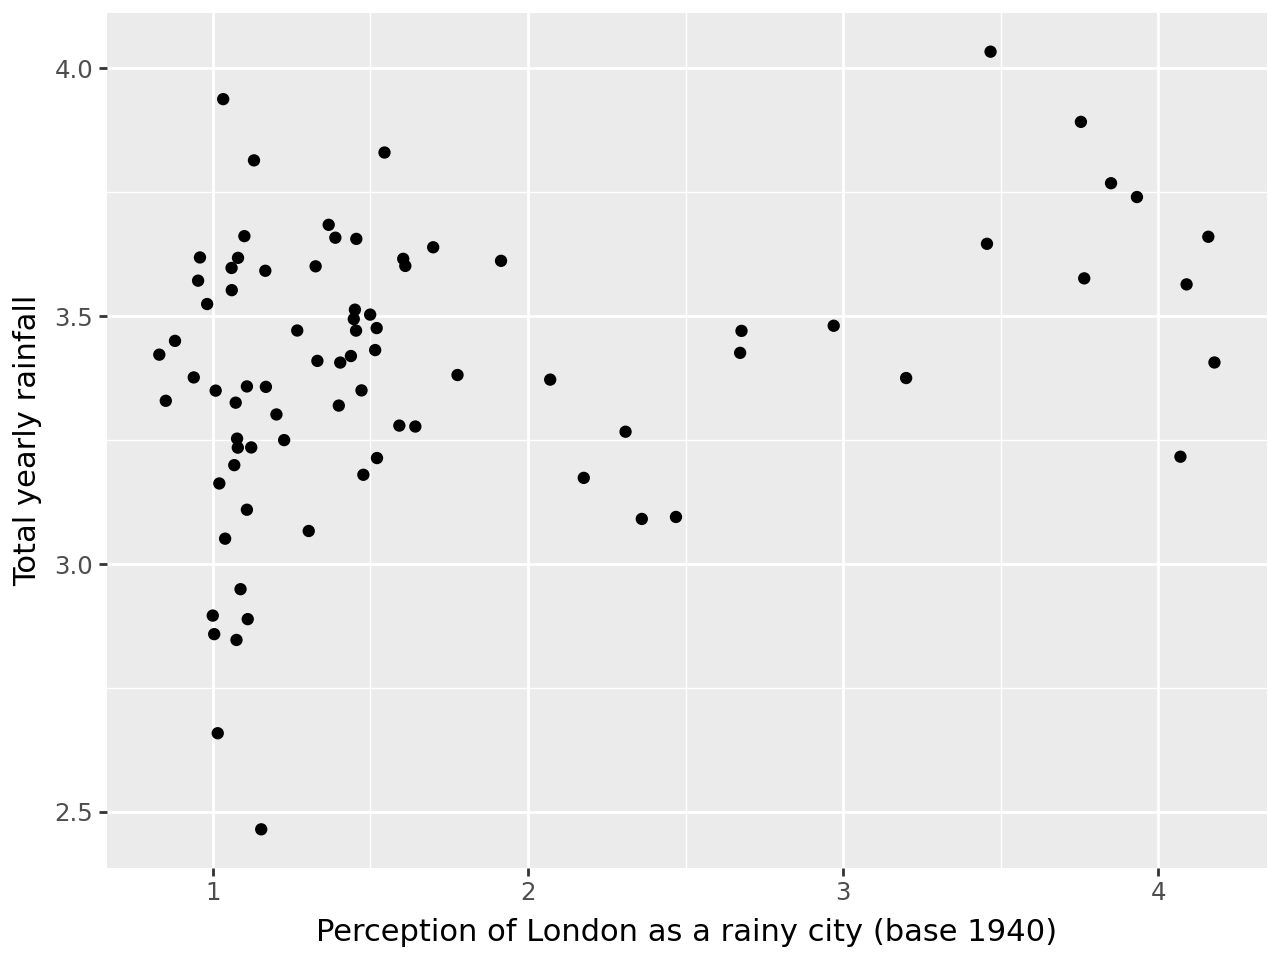

In [72]:
g = (
    ggplot(df, aes(x='Perception', y='rain_sum')) +
    geom_point() + 
    labs(x='Perception of London as a rainy city (base 1940)', y='Total yearly rainfall')
)

g